# Info
Purpose:

    Describe the details ...

Input:

    arguments

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2023-04-27
    Modified:


# Prepare python environment

In [3]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os


In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
name = 'sunsat'
vv = 'v1'
fp = getpath(name)


Return path named:  sunsat /data/sunsat/


In [6]:
fp = fp+'COAST_2011/'

In [16]:
fpp = fp+'plots/'

# Load files

In [7]:
a,adict = lu.load_netcdf(fp+'data_archival/COAST_AATS14_2011_R0.nc',everything=True)

Reading file: /data/sunsat/COAST_2011/data_archival/COAST_AATS14_2011_R0.nc
Outputting the Data subdatasets:
0: base_time
1: time_offset
2: time
3: wavelength
4: Latitude
5: Longitude
6: GPS_Alt
7: qual_flag
8: land_ocean
9: altitude_flag
10: AOD
11: UNC
12: polynomial
13: cWV1
14: std_cWV1
15: cO3
[b'base_time', b'time_offset', b'time', b'wavelength', b'Latitude', b'Longitude', b'GPS_Alt', b'qual_flag', b'land_ocean', b'altitude_flag', b'AOD', b'UNC', b'polynomial', b'cWV1', b'std_cWV1', b'cO3']


In [21]:
adict[b'qual_flag']

<class 'netCDF4._netCDF4.Variable'>
float64 qual_flag(time)
    long_name: Flag, quality of retrieved AOD: 0=good; 1=poor, due to clouds or instrument bad tracking
    units: unitless
unlimited dimensions: time
current shape = (20098,)
filling on, default _FillValue of 9.969209968386869e+36 used

# Plot out data

In [11]:
a[b'Latitude'].shape

(20098,)

In [13]:
a[b'AOD'].shape

(20098, 12)

In [14]:
a[b'wavelength']

masked_array(data=[ 354.,  380.,  452.,  501.,  520.,  605.,  675.,  780.,
                    865., 1019., 1236., 2139.],
             mask=False,
       fill_value=1e+20)

In [15]:
i500 = 3

<IPython.core.display.Javascript object>


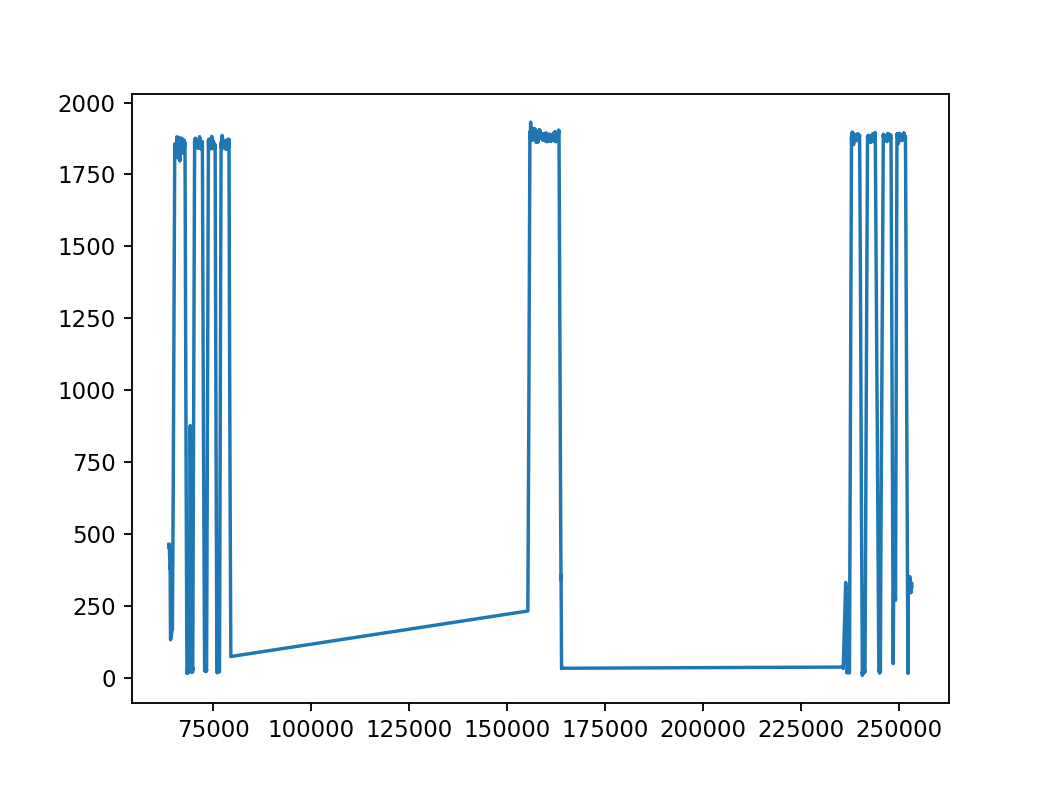

In [19]:
plt.figure()
plt.plot(a[b'time'],a[b'GPS_Alt'])

<IPython.core.display.Javascript object>


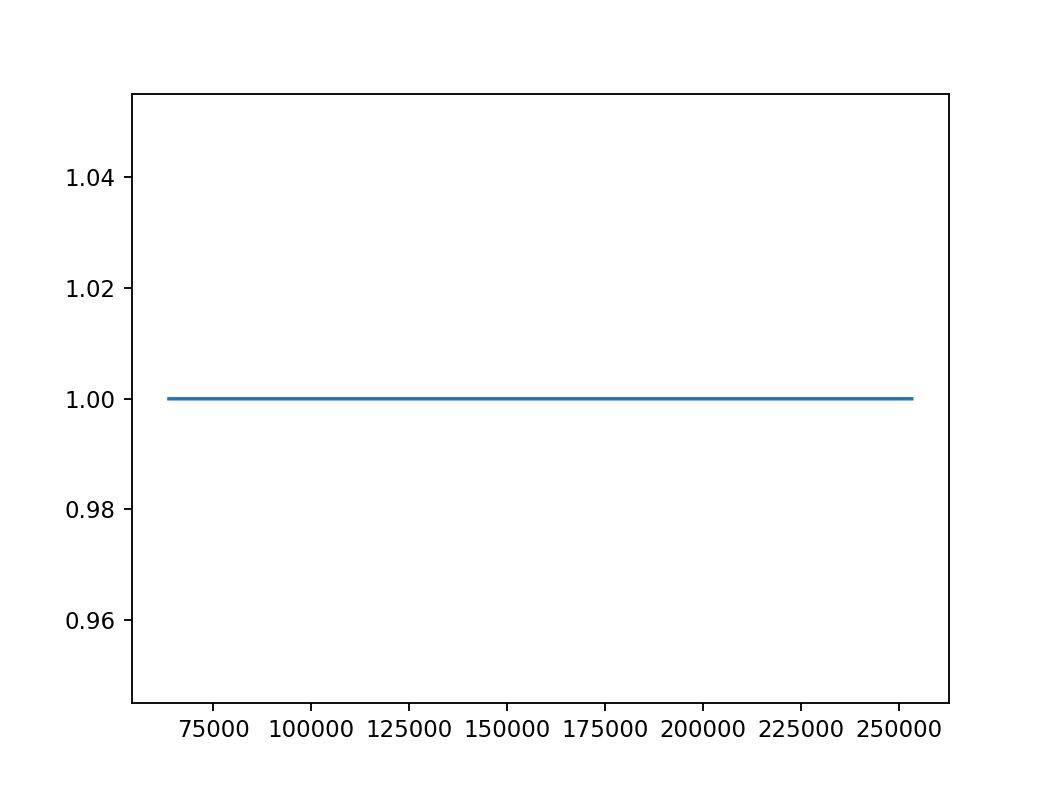

In [30]:
plt.figure()
plt.plot(a[b'time'],a[b'qual_flag'])

In [31]:
fl = (a[b'GPS_Alt']<1000.0)# & (a[b'qual_flag']<1)

In [28]:
a[b'qual_flag']

masked_array(data=[1., 1., 1., ..., 1., 1., 1.],
             mask=False,
       fill_value=1e+20)

In [36]:
adict[b'base_time']

<class 'netCDF4._netCDF4.Variable'>
int32 base_time()
    string: 26-Oct-2011 17:41:05 GMT
    long_name: Base time in Epoch
    units: seconds since 1970-1-1 0:00:00 0:00
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used

<IPython.core.display.Javascript object>


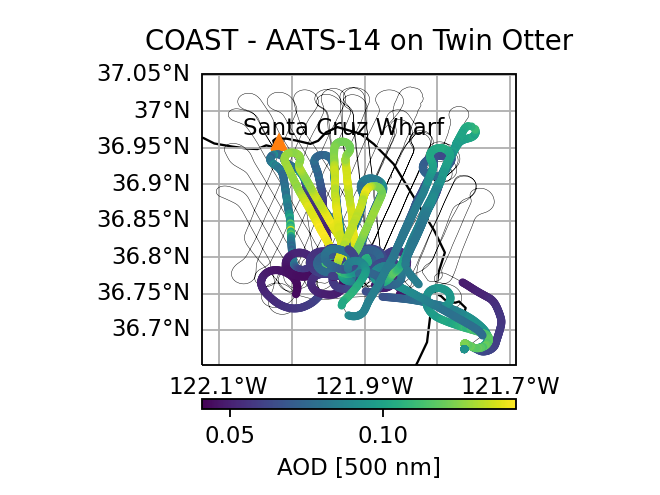

/home/sam/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/sam/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


In [70]:
fig = plt.figure(figsize=(4,3))
proj = ccrs.PlateCarree()#(-120, 45)#(central_latitude=np.nanmean(nav['FMS_LAT']), central_longitude=np.nanmean(nav['FMS_LON']))

ax = fig.add_subplot(111,projection=proj)
ax.plot(a[b'Longitude'],a[b'Latitude'],'k-',lw=0.2)
axs = ax.scatter(a[b'Longitude'][fl],a[b'Latitude'][fl],c=a[b'AOD'][fl,i500],marker='o',s=6,zorder=10)
#ax.scatter(nav['FMS_LON'][ifl],nav['FMS_LAT'][ifl],c='r'',marker='x',s=12)
ax.plot(-122.01721311779664,36.95717375523506,'^',color='tab:orange')
ax.text(-122.01721311779664-0.05,36.95717375523506+0.01,'Santa Cruz Wharf')

ax.coastlines(resolution='10m')
gl = ax.gridlines(draw_labels=True,auto_update=True)
gl.xlabels_top = False
gl.ylabels_right = False


cbar_ax = fig.add_axes([0.1, 0.1, 0.1, 0.1])
fig.subplots_adjust(hspace=0.0, wspace=0, top=1, left=0.09)
posn = ax.get_position()
ax.set_position([posn.x0+0.1, posn.y0+0.15, posn.width-0.1, posn.height-0.3])
posn = ax.get_position()
cbar_ax.set_position([posn.x0 , posn.y0-0.09,
                          posn.width, 0.02])
cbar = plt.colorbar(axs,cax=cbar_ax,label='AOD [500 nm]',orientation='horizontal')

ax.set_title('COAST - AATS-14 on Twin Otter')
plt.savefig(fpp+'CAOST_TO_AOD_map.png',dpi=400,transparent=True)

In [71]:
np.nanmean(a[b'GPS_Alt'][fl])

318.8310935662691

In [72]:
np.nanmedian(a[b'GPS_Alt'][fl])

/home/sam/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


300.8

In [ ]:
ax.gridlines()